<a href="https://colab.research.google.com/github/astrrr/Financial-Analysis/blob/main/price_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.datasets import make_blobs

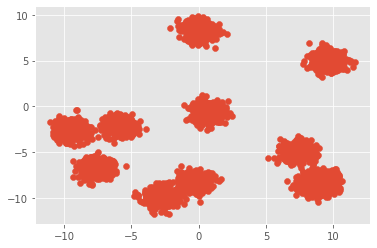

In [28]:
#centers = [[3,3,3],[4,5,5],[3,10,10]]
#X, _ = make_blobs(n_samples = 5000, centers = centers, cluster_std = 0.5)
X, _ = make_blobs(n_samples = 5000, centers = 11, cluster_std = 0.6)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [29]:
ms = MeanShift(bandwidth=1, max_iter=1000)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)


[[ 8.88878333 -8.3588277 ]
 [ 7.33607636 -5.0021418 ]
 [ 0.08218594  8.24302732]
 [-6.02719023 -2.09061817]
 [-2.89764132 -9.76662907]
 [-7.56056323 -6.64885021]
 [ 0.67842267 -0.60424945]
 [-0.27965593 -8.11896335]
 [ 9.66243672  4.9519182 ]
 [-9.56185287 -2.65088937]]
Estimated clusters: 10


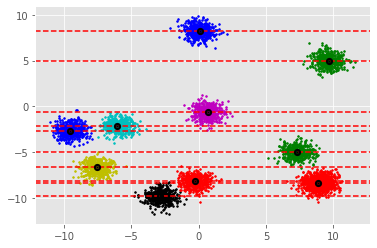

In [30]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 3)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker=".",color='k', s=20, linewidths = 5, zorder=10)

for i in range(len(cluster_centers)):
  plt.axhline(y = cluster_centers[i,1], color = 'r', linestyle = 'dashed')  
plt.show()

#Download Data

In [31]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import yfinance as yf

In [33]:
dji = yf.download('^DJI', interval='15m', period='ytd')

[*********************100%***********************]  1 of 1 completed


In [34]:
dji

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-03 09:30:00-05:00,33148.898438,33387.519531,33148.898438,33308.800781,33308.800781,13334084
2023-01-03 09:45:00-05:00,33308.109375,33310.210938,33027.628906,33031.851562,33031.851562,19995865
2023-01-03 10:00:00-05:00,33032.261719,33134.578125,33032.261719,33081.750000,33081.750000,14165701
2023-01-03 10:15:00-05:00,33082.140625,33095.378906,33005.750000,33060.480469,33060.480469,14553012
2023-01-03 10:30:00-05:00,33065.429688,33118.378906,33015.480469,33109.191406,33109.191406,12810432
...,...,...,...,...,...,...
2023-01-27 15:00:00-05:00,34112.871094,34164.328125,34112.871094,34115.039062,34115.039062,11149593
2023-01-27 15:15:00-05:00,34114.898438,34126.070312,34081.890625,34115.359375,34115.359375,11160907
2023-01-27 15:30:00-05:00,34115.679688,34125.031250,34075.031250,34078.578125,34078.578125,15055425


#add typical price to df

In [35]:
import pandas as pd

In [36]:
df = pd.DataFrame(dji)

In [37]:
df['Close'][3]

33060.48046875

In [38]:
tp_list = []
for i in range(len(dji)):
  tp = (df['High'][i]  + df['Low'][i] + df['Close'][i])/ 3
  tp_list.append(tp)

In [39]:
tp_list

[33281.739583333336,
 33123.23046875,
 33082.86328125,
 33053.869791666664,
 33081.016927083336,
 33118.4296875,
 33014.2265625,
 32987.006510416664,
 32960.3359375,
 32942.34375,
 32965.454427083336,
 32935.93359375,
 32954.446614583336,
 32895.869791666664,
 32913.970052083336,
 32956.213541666664,
 32967.248697916664,
 32983.04296875,
 32970.653645833336,
 32939.946614583336,
 32934.630208333336,
 33021.016927083336,
 33055.783854166664,
 33056.95703125,
 33079.00390625,
 33117.283854166664,
 33235.403645833336,
 33249.8359375,
 33154.046875,
 33120.506510416664,
 33140.864583333336,
 33197.563802083336,
 33212.404947916664,
 33221.592447916664,
 33319.502604166664,
 33382.18359375,
 33373.897135416664,
 33373.4296875,
 33386.83984375,
 33324.23046875,
 33288.223958333336,
 33326.2265625,
 33337.647135416664,
 33300.24609375,
 33251.96484375,
 33155.936197916664,
 33115.3671875,
 33166.08984375,
 33227.106770833336,
 33199.868489583336,
 33121.3359375,
 33208.033854166664,
 32986.45

In [40]:
df['Typical_price'] = tp_list

In [41]:
df

,Open,High,Low,Close,Adj Close,Volume,Typical_price
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,33148.898438,33387.519531,33148.898438,33308.800781,33308.800781,13334084,33281.739583
2023-01-03 09:45:00-05:00,33308.109375,33310.210938,33027.628906,33031.851562,33031.851562,19995865,33123.230469
2023-01-03 10:00:00-05:00,33032.261719,33134.578125,33032.261719,33081.750000,33081.750000,14165701,33082.863281
2023-01-03 10:15:00-05:00,33082.140625,33095.378906,33005.750000,33060.480469,33060.480469,14553012,33053.869792
2023-01-03 10:30:00-05:00,33065.429688,33118.378906,33015.480469,33109.191406,33109.191406,12810432,33081.016927
...,...,...,...,...,...,...,...
2023-01-27 15:00:00-05:00,34112.871094,34164.328125,34112.871094,34115.039062,34115.039062,11149593,34130.746094
2023-01-27 15:15:00-05:00,34114.898438,34126.070312,34081.890625,34115.359375,34115.359375,11160907,34107.773438
2023-01-27 15:30:00-05:00,34115.679688,34125.031250,34075.031250,34078.578125,34078.578125,15055425,34092.880208


In [42]:
id = [i for i in range(len(df))]
df['index'] = id

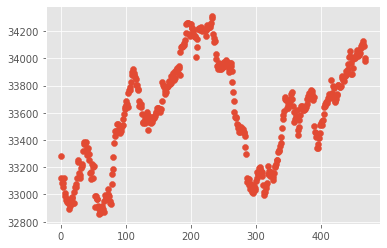

In [43]:
plt.scatter(df['index'], df['Typical_price'])
plt.show()

In [44]:
X = df[[ 'Typical_price', 'index',]]

ms = MeanShift(bandwidth=60, max_iter=1000)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)

[[3.37009421e+04 3.86674419e+02]
 [3.42148130e+04 2.12289474e+02]
 [3.29579671e+04 4.28666667e+01]
 [3.36135585e+04 1.31068966e+02]
 [3.35511825e+04 1.26074074e+02]
 [3.31542441e+04 3.12222222e+02]
 [3.39478519e+04 2.51000000e+02]
 [3.38140979e+04 1.50625000e+02]
 [3.30675490e+04 3.00347826e+02]
 [3.41359668e+04 2.05190476e+02]
 [3.38356285e+04 4.31894737e+02]
 [3.40197833e+04 4.54388889e+02]
 [3.35482037e+04 3.75470588e+02]
 [3.38878644e+04 1.71937500e+02]
 [3.31557420e+04 3.91875000e+01]
 [3.34750153e+04 2.77000000e+02]
 [3.34648654e+04 3.79615385e+02]
 [3.32796844e+04 3.83076923e+01]
 [3.33447269e+04 4.24545455e+01]
 [3.30564482e+04 2.57000000e+01]
 [3.33419624e+04 3.58125000e+02]
 [3.35553242e+04 2.69500000e+02]
 [3.38233268e+04 2.64000000e+02]
 [3.37534336e+04 2.65000000e+02]
 [3.36832161e+04 2.66000000e+02]]
Estimated clusters: 25


In [45]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

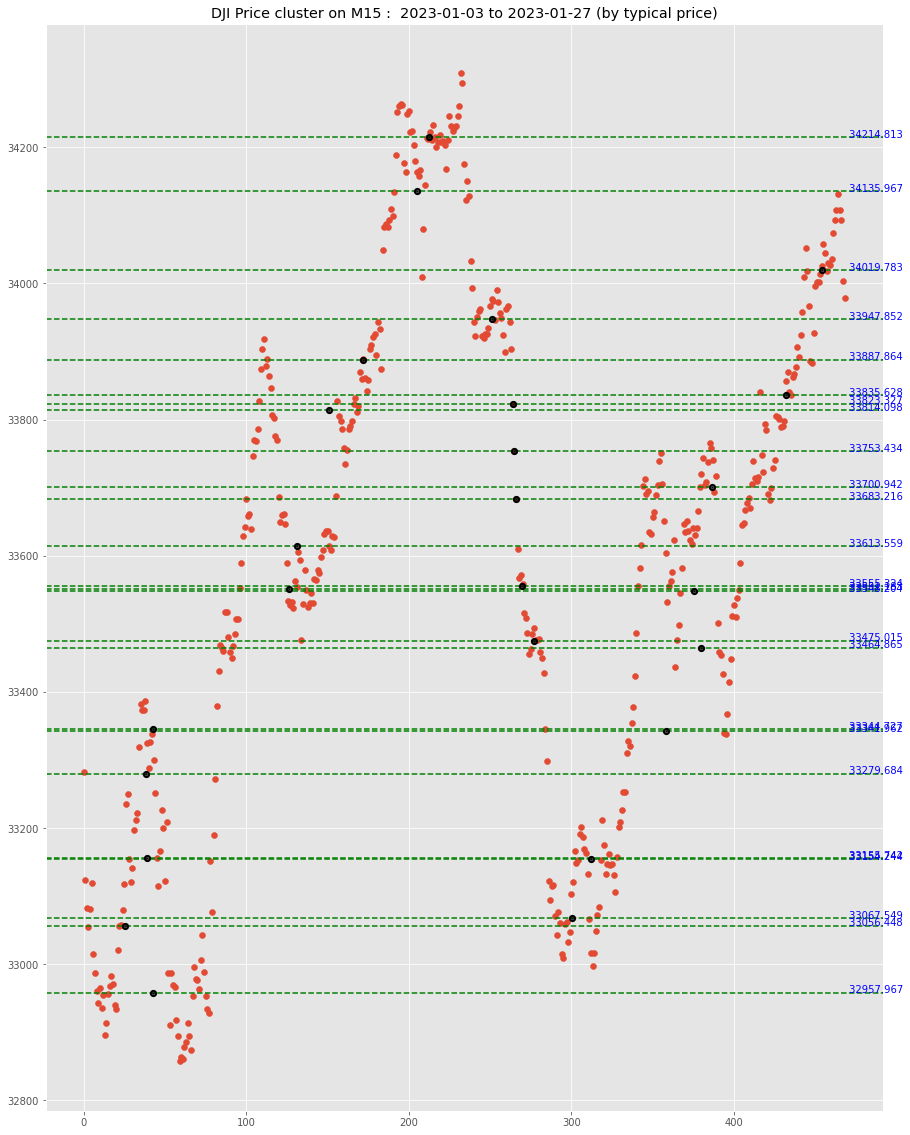

In [46]:
plt.rcParams["figure.figsize"] = (15,20)
plt.title('DJI Price cluster on M15 :  2023-01-03 to 2023-01-27 (by typical price)')
plt.scatter(df['index'], df['Typical_price'])
plt.scatter(cluster_centers[:,1],cluster_centers[:,0],marker=".",color='k', s=20, linewidths = 5, zorder=10)
for i in range(len(cluster_centers)):
  plt.axhline(y = cluster_centers[i,0], color = 'g', linestyle = 'dashed')
  plt.text(len(df), cluster_centers[i,0],  f'{cluster_centers[i,0] : .3f}', color = 'b')  
plt.show()

In [49]:
#gen hline for pine script 555555
for i in cluster_centers:
  print('hline('+f'{i[0]:.3f}'+', title="34k", color=color.rgb(24, 70, 233), linestyle=hline.style_dashed)')

hline(33700.942, title="34k", color=color.rgb(24, 70, 233), linestyle=hline.style_dashed)
hline(34214.813, title="34k", color=color.rgb(24, 70, 233), linestyle=hline.style_dashed)
hline(32957.967, title="34k", color=color.rgb(24, 70, 233), linestyle=hline.style_dashed)
hline(33613.559, title="34k", color=color.rgb(24, 70, 233), linestyle=hline.style_dashed)
hline(33551.183, title="34k", color=color.rgb(24, 70, 233), linestyle=hline.style_dashed)
hline(33154.244, title="34k", color=color.rgb(24, 70, 233), linestyle=hline.style_dashed)
hline(33947.852, title="34k", color=color.rgb(24, 70, 233), linestyle=hline.style_dashed)
hline(33814.098, title="34k", color=color.rgb(24, 70, 233), linestyle=hline.style_dashed)
hline(33067.549, title="34k", color=color.rgb(24, 70, 233), linestyle=hline.style_dashed)
hline(34135.967, title="34k", color=color.rgb(24, 70, 233), linestyle=hline.style_dashed)
hline(33835.628, title="34k", color=color.rgb(24, 70, 233), linestyle=hline.style_dashed)
hline(3401